In [483]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, confusion_matrix, accuracy_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [484]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [485]:
# Looking at data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [486]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [487]:
#Checking for null values
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

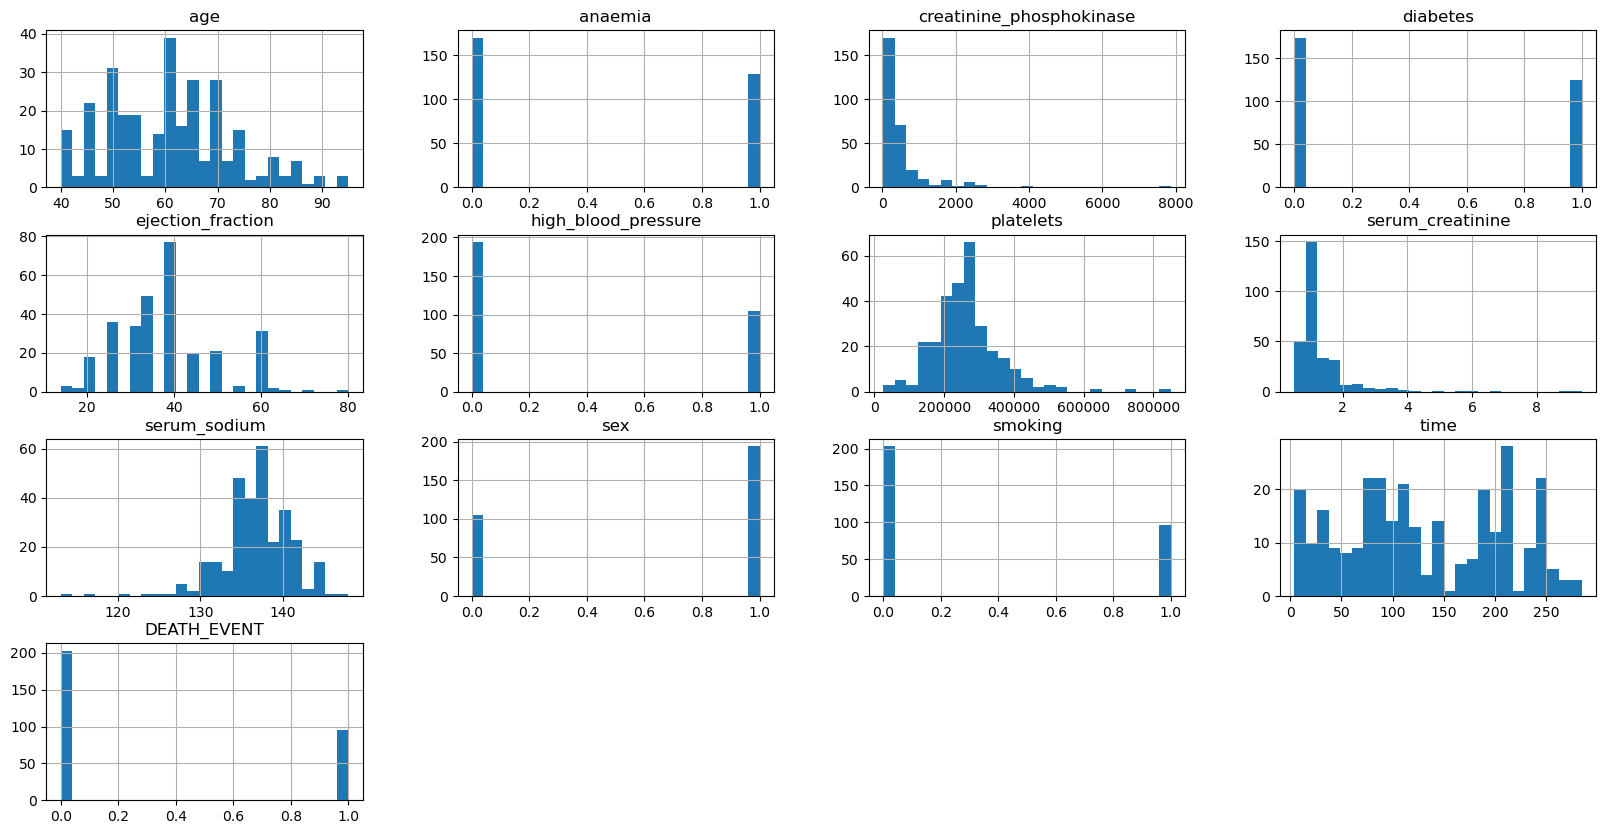

In [488]:
# Taking a look at the distribution of the different features
df.hist(bins=25, figsize=(20,10))
plt.show()

<Axes: >

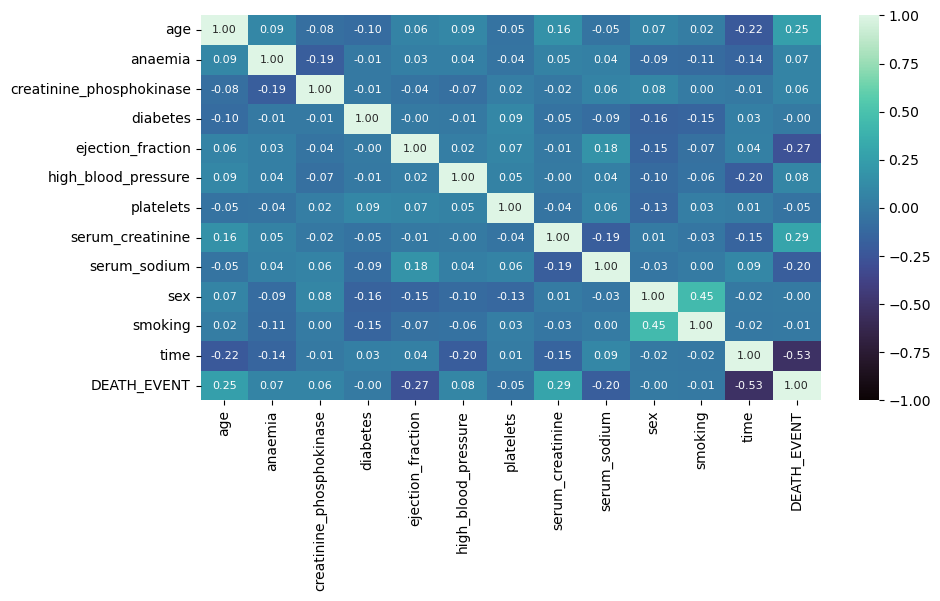

In [489]:
# PLotting a correlation graph to check what features to focus on relating to survival rate
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="mako", annot=True, fmt=".2f", annot_kws={'size': 8})  

In [490]:
# split the ages and time into bins
def age_splitting(df):
    bins = list(range(40, 100, 5))
    df['Age_Bins'] = pd.cut(df['age'], bins=bins)

def time_splitting(df):
    bins = list(range(0, 360, 60))
    df['time_bins'] = pd.cut(df['time'], bins=bins)

age_splitting(df)
time_splitting(df)
df_plot = df


survival DEATH_EVENT
0    0.67893
1    0.32107
Name: count, dtype: float64


Text(0.5, 1.0, 'Number of patient deaths')

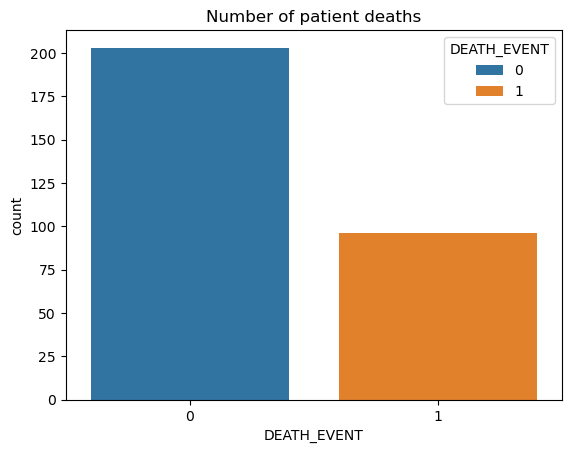

In [491]:
# Plotting number of patients that died and survived and how these compare in this small dataset
sns.countplot(data=df_plot, x='DEATH_EVENT', hue='DEATH_EVENT')
print(f"survival {df_plot['DEATH_EVENT'].value_counts()/df_plot['DEATH_EVENT'].count()}")
plt.title("Number of patient deaths")

Text(0.5, 1.0, '')

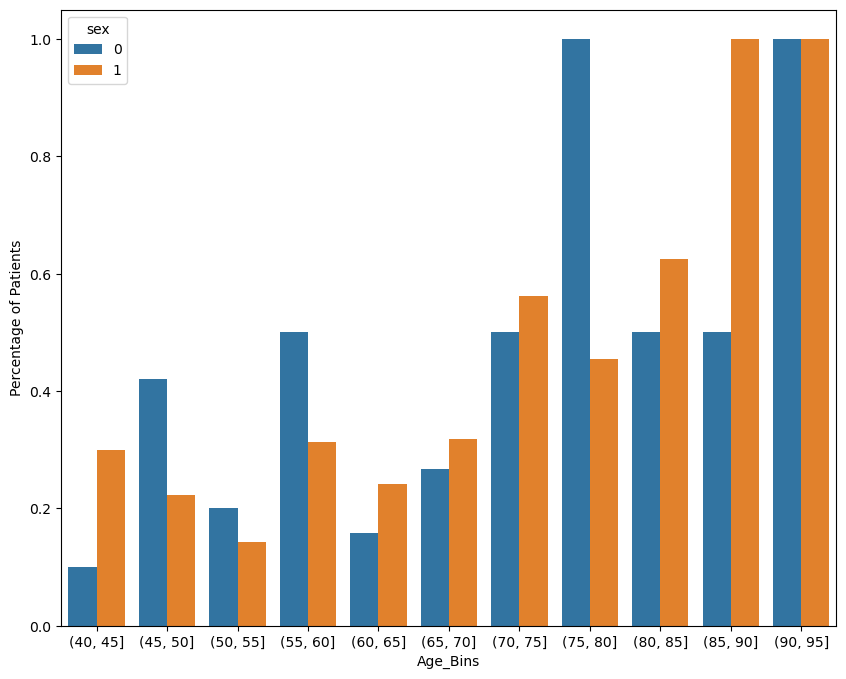

In [492]:
# Exploring deaths by age
plt.figure(figsize=(10, 8))
sns.barplot(x=df_plot['Age_Bins'], y=df_plot["DEATH_EVENT"], hue=df_plot['sex'], errorbar=None)
plt.ylabel("Death event rate")
plt.title("Survival vs age per sex")


Text(0.5, 1.0, 'Number of male and female patients')

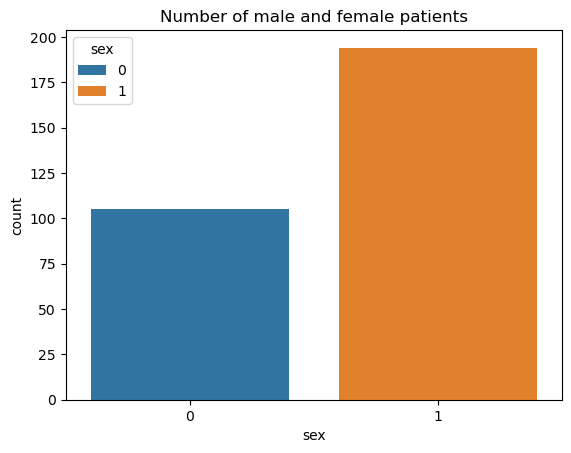

In [494]:
sns.countplot(x=df['sex'], hue=df['sex'])
df_plot['sex'].value_counts()/df_plot['sex'].count()
plt.title("Number of male and female patients")

Text(0.5, 1.0, 'age vs survival')

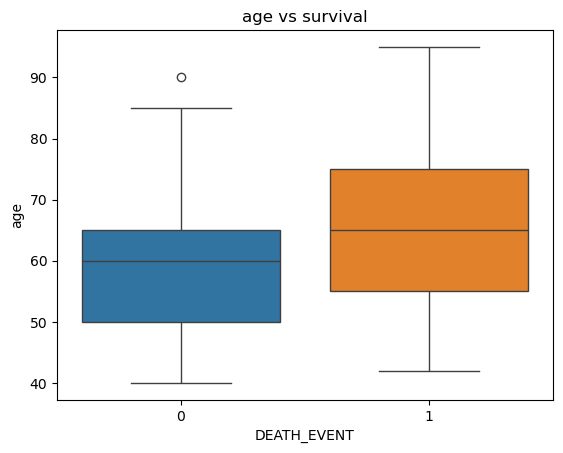

In [537]:
# Boxplot of age vs survival
sns.boxplot(data=df, x='DEATH_EVENT', y='age', hue='DEATH_EVENT', legend=None)
plt.title("age vs survival")


<Axes: xlabel='DEATH_EVENT', ylabel='smoking'>

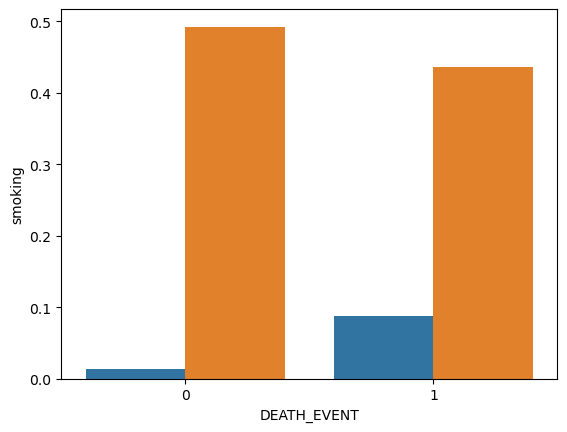

In [496]:
sns.barplot(data=df, x='DEATH_EVENT', y='smoking', hue='sex', legend=None, errorbar=None)


<Axes: xlabel='anaemia', ylabel='DEATH_EVENT'>

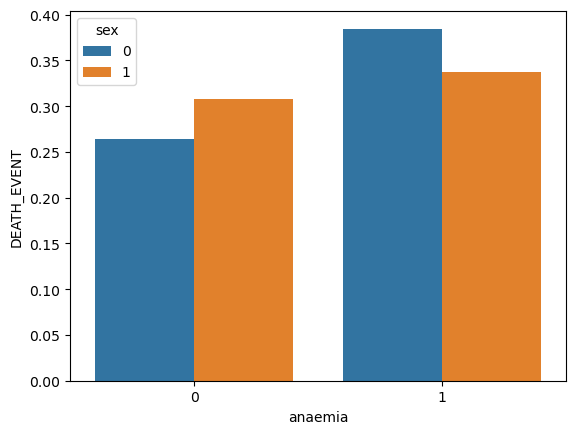

In [497]:
sns.barplot(data=df, x='anaemia', y='DEATH_EVENT', hue='sex', errorbar=None)

Text(0.5, 1.0, 'Serum Creatine vs Death event')

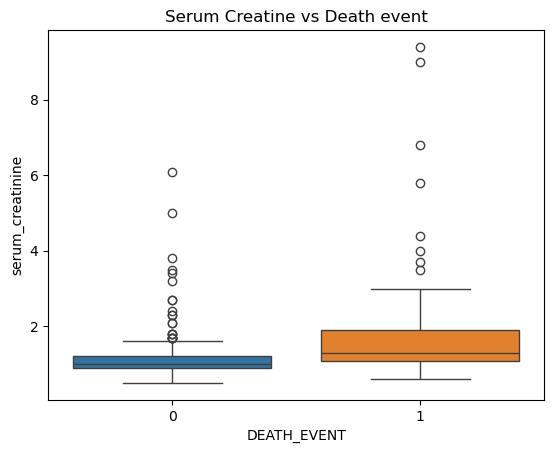

In [498]:
sns.boxplot(data=df, x='DEATH_EVENT', y='serum_creatinine', hue='DEATH_EVENT', legend=None)
plt.title("Serum Creatine vs Death event")

Text(0.5, 0, 'time(days)')

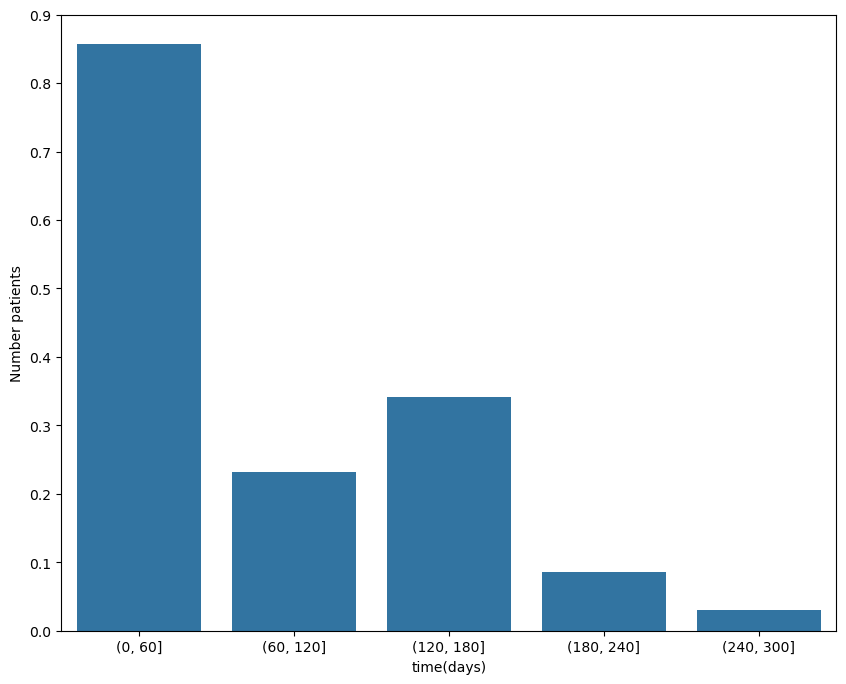

In [499]:
# Looking at the number of patients that died vs time(in days)
plt.figure(figsize=(10, 8))
sns.barplot(x=df_plot['time_bins'], y=df_plot['DEATH_EVENT'], errorbar=None)
plt.ylabel("Number patients")
plt.xlabel("time(days)")

Text(0.5, 1.0, 'time vs Death_event')

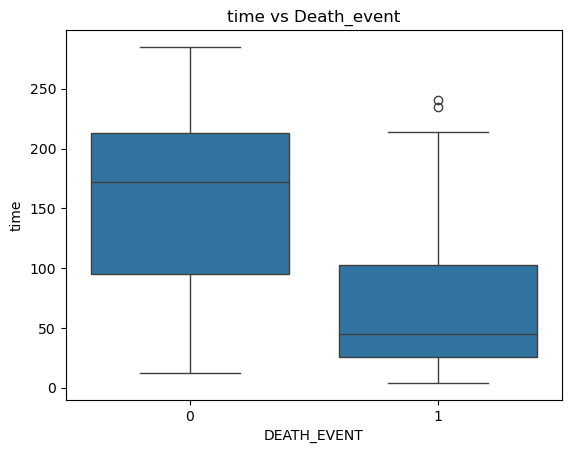

In [500]:
# Boxplot of time against survival 
sns.boxplot(y=df_plot['time'], x=df_plot['DEATH_EVENT'])
plt.title("time vs Death_event")

In [501]:
# Removing the added bucketted columns used for visualization
df = df.drop(['Age_Bins', 'time_bins'], axis=1)

In [502]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [503]:
# Dropping the bucketted table created previously for visualization and splitting the data
# splitting data into using only the most correlated features with survival 

X_corr_features = df.iloc[:, [4, 7, 11]].values
Y_corr_features = df.iloc[:, -1].values

In [504]:
X_corr_features

array([[ 20.  ,   1.9 ,   4.  ],
       [ 38.  ,   1.1 ,   6.  ],
       [ 20.  ,   1.3 ,   7.  ],
       [ 20.  ,   1.9 ,   7.  ],
       [ 20.  ,   2.7 ,   8.  ],
       [ 40.  ,   2.1 ,   8.  ],
       [ 15.  ,   1.2 ,  10.  ],
       [ 60.  ,   1.1 ,  10.  ],
       [ 65.  ,   1.5 ,  10.  ],
       [ 35.  ,   9.4 ,  10.  ],
       [ 38.  ,   4.  ,  10.  ],
       [ 25.  ,   0.9 ,  10.  ],
       [ 30.  ,   1.1 ,  11.  ],
       [ 38.  ,   1.1 ,  11.  ],
       [ 30.  ,   1.  ,  12.  ],
       [ 50.  ,   1.3 ,  13.  ],
       [ 38.  ,   0.9 ,  14.  ],
       [ 14.  ,   0.8 ,  14.  ],
       [ 25.  ,   1.  ,  15.  ],
       [ 55.  ,   1.9 ,  15.  ],
       [ 25.  ,   1.3 ,  16.  ],
       [ 30.  ,   1.6 ,  20.  ],
       [ 35.  ,   0.9 ,  20.  ],
       [ 60.  ,   0.8 ,  22.  ],
       [ 30.  ,   1.83,  23.  ],
       [ 38.  ,   1.9 ,  23.  ],
       [ 40.  ,   1.  ,  24.  ],
       [ 45.  ,   1.3 ,  26.  ],
       [ 38.  ,   5.8 ,  26.  ],
       [ 30.  ,   1.2 ,  26.  ],
       [ 3

In [505]:
# Splitting the data into training and testing data with 20% being test and 80% being training data
X_train, X_test, Y_train, Y_test = train_test_split(X_corr_features, Y_corr_features, test_size=0.20, random_state=42)

In [506]:
scaler = StandardScaler()

In [507]:
# Scaling the data with standard scaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [508]:
# Logistic regression
log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train, Y_train)
y_log_reg = log_reg.predict(X_test)
acc_log_reg = round(accuracy_score(Y_test, y_log_reg)*100, 2)
print(acc_log_reg)

80.0


In [509]:
print(classification_report(Y_test, y_log_reg))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85        35
           1       0.88      0.60      0.71        25

    accuracy                           0.80        60
   macro avg       0.82      0.77      0.78        60
weighted avg       0.82      0.80      0.79        60



0.8


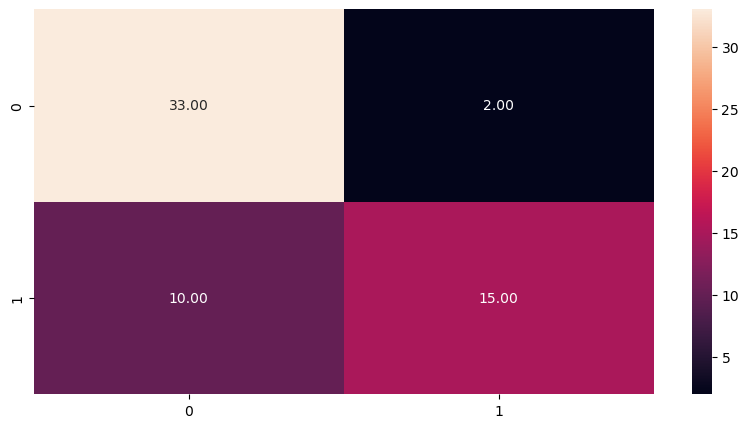

In [510]:
# Confusion matrix of logistic regression
cm = confusion_matrix(Y_test, y_log_reg)
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='.2f')

acc_score = accuracy_score(Y_test, y_log_reg)
print(acc_score)

In [511]:
# GaussianNB
gaussian = GaussianNB()

gaussian.fit(X_train, Y_train)
y_gaussian = gaussian.predict(X_test)
acc_gaussian = round(accuracy_score(Y_test, y_gaussian) * 100, 2)
print(acc_gaussian)

75.0


In [512]:
print(classification_report(Y_test, y_gaussian))

              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60



0.75


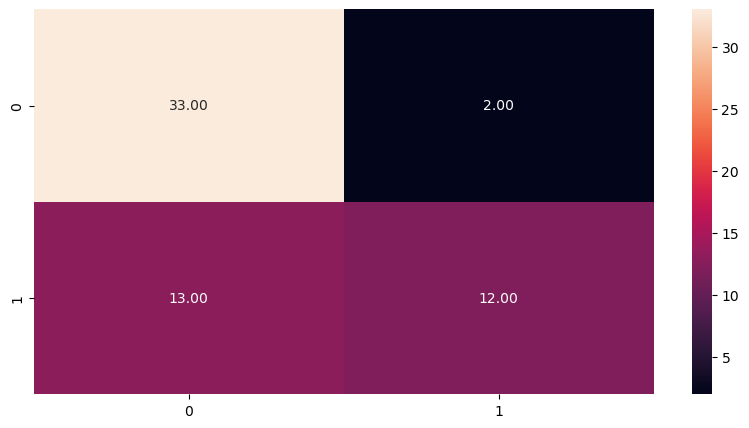

In [513]:
# Confusion matrix of GaussianNB
cm = confusion_matrix(Y_test, y_gaussian)
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='.2f')

acc_score = accuracy_score(Y_test, y_gaussian)
print(acc_score)

In [514]:
# Support vector machine
svc = SVC()

svc.fit(X_train, Y_train)
y_svc = svc.predict(X_test)
acc_svc = round(accuracy_score(Y_test, y_svc)*100, 2)
print(acc_svc)

76.67


In [515]:
print(classification_report(Y_test, y_svc))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        35
           1       0.76      0.64      0.70        25

    accuracy                           0.77        60
   macro avg       0.77      0.75      0.75        60
weighted avg       0.77      0.77      0.76        60



0.7666666666666667


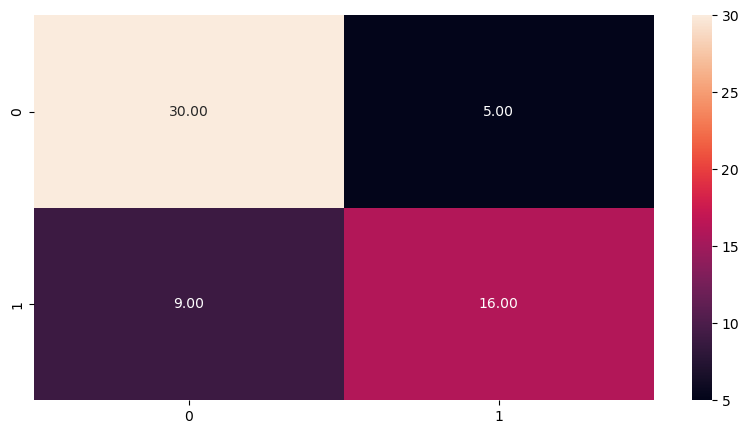

In [516]:
# Confusion matrix of SVC
cm = confusion_matrix(Y_test, y_svc)
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='.2f')

acc_score = accuracy_score(Y_test, y_svc)
print(acc_score)

In [517]:
# K nearest neighbours
knn = KNeighborsClassifier()

knn.fit(X_train, Y_train)
y_knn = knn.predict(X_test)
acc_knn = round(accuracy_score(Y_test, y_knn)*100, 2)
print(acc_knn)

76.67


In [518]:
print(classification_report(Y_test, y_knn))

              precision    recall  f1-score   support

           0       0.74      0.91      0.82        35
           1       0.82      0.56      0.67        25

    accuracy                           0.77        60
   macro avg       0.78      0.74      0.74        60
weighted avg       0.78      0.77      0.76        60



0.7666666666666667


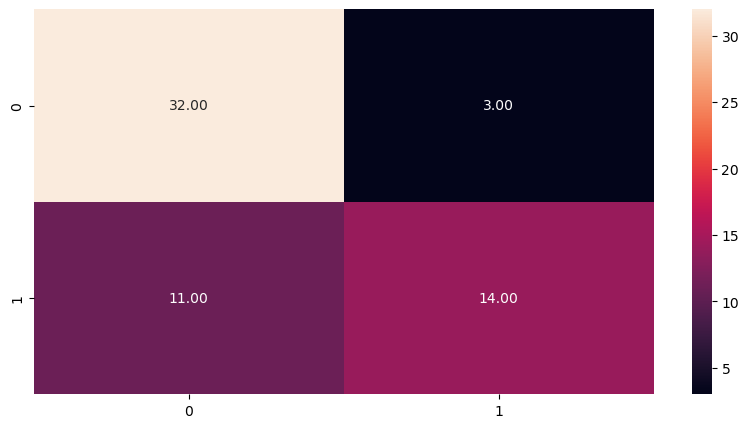

In [519]:
# Confusion matrix of KNN
cm = confusion_matrix(Y_test, y_knn)
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='.2f')

acc_score = accuracy_score(Y_test, y_knn)
print(acc_score)

In [520]:
# Random forest
randomforest = RandomForestClassifier()

randomforest.fit(X_train, Y_train)
y_randomforest = randomforest.predict(X_test)
acc_randomforest = round(accuracy_score(Y_test, y_randomforest)*100, 2)
print(acc_randomforest)

76.67


In [521]:
print(classification_report(Y_test, y_randomforest))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        35
           1       0.79      0.60      0.68        25

    accuracy                           0.77        60
   macro avg       0.77      0.74      0.75        60
weighted avg       0.77      0.77      0.76        60



0.7666666666666667


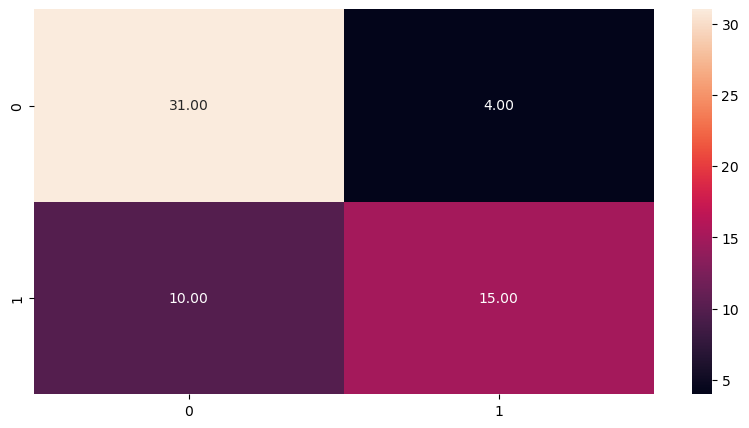

In [522]:
# Confusion matrix of Random Forest
cm = confusion_matrix(Y_test, y_randomforest)
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='.2f')

acc_score = accuracy_score(Y_test, y_randomforest)
print(acc_score)

In [523]:
model = Sequential()
# Input layer
model.add(Dense(units = 16, kernel_initializer='uniform', activation='relu', input_shape=(3,)))
# Hidden layer
model.add(Dense(units = 32, kernel_initializer='uniform', activation='relu'))
# Hidden layer
model.add(Dense(units = 16, kernel_initializer='uniform', activation='relu'))
# Regularization
model.add(Dropout(0.25))
# Output layer
model.add(Dense(units = 1, kernel_initializer='uniform', activation='sigmoid'))

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size = 10, epochs = 100, validation_split=0.20)

Epoch 1/100
20/20 [==============================] - 1s 12ms/step - loss: 0.6914 - accuracy: 0.6649 - val_loss: 0.6875 - val_accuracy: 0.7500
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6865 - accuracy: 0.6911 - val_loss: 0.6798 - val_accuracy: 0.7500
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6751 - accuracy: 0.6911 - val_loss: 0.6508 - val_accuracy: 0.7500
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6355 - accuracy: 0.6911 - val_loss: 0.5728 - val_accuracy: 0.7500
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5411 - accuracy: 0.6911 - val_loss: 0.4496 - val_accuracy: 0.7500
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4628 - accuracy: 0.6911 - val_loss: 0.3683 - val_accuracy: 0.7500
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4437 - accuracy: 0.6911 - val_loss: 0.3485 - val_accuracy: 0.7500
Epoch 8/100


In [524]:
val_accuracy = round(np.mean(history.history['val_accuracy'])*100, 2)
print(f'val_accuracy is: {val_accuracy}')

val_accuracy is: 89.17


In [525]:
# Saving model
model.save("Heart_allf_ann.keras")

In [526]:
# Loading the model
heart_model = tf.keras.models.load_model('Heart_allf_ann.keras')

In [527]:
# Predicting values from X_test and making the values be 0 or 1 if higher or lower than 0.5
y_pred_ann = heart_model.predict(X_test)
y_pred_ann = np.where(y_pred_ann > 0.5, 1, 0)


2/2 [==============================] - 0s 0s/step


In [528]:
y_pred_ann = y_pred_ann.flatten()
y_pred_ann

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [529]:
pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred_ann})

,Actual,Predicted
0,0,0
1,0,0
2,1,0
3,1,1
4,0,0
5,0,0
6,1,1
7,0,0
8,1,1
9,0,0


In [530]:
print(classification_report(Y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        35
           1       0.73      0.64      0.68        25

    accuracy                           0.75        60
   macro avg       0.75      0.73      0.74        60
weighted avg       0.75      0.75      0.75        60



0.75


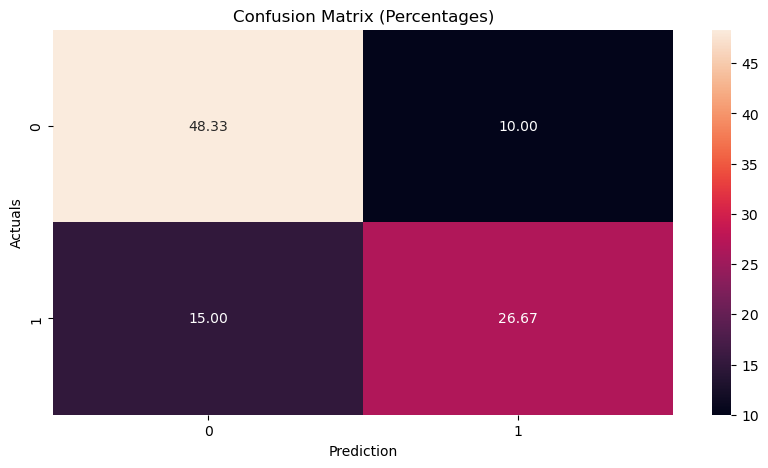

In [531]:
# Confusion matrix with the percentage of values
cm = confusion_matrix(Y_test, y_pred_ann)
plt.figure(figsize=(10, 5))
sns.heatmap(cm/np.sum(cm)*100, annot=True, fmt='.2f')
plt.xlabel("Prediction")
plt.ylabel("Actuals")
plt.title("Confusion Matrix (Percentages)")

acc_score = accuracy_score(Y_test, y_pred_ann)
print(acc_score)

AUC: 0.734286


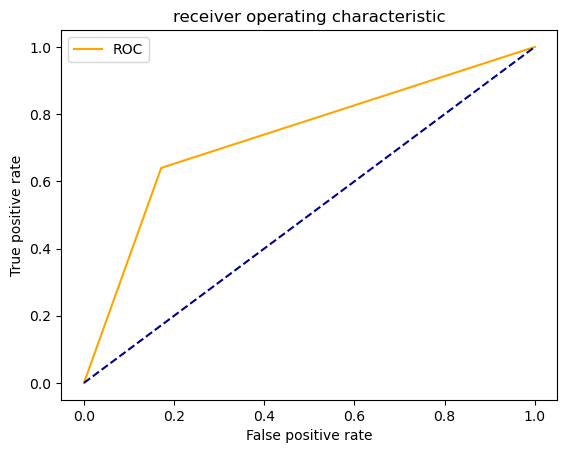

In [532]:
# ROC curve of ANN
auc_mod = roc_auc_score(Y_test, y_pred_ann)
print('AUC: %f' %auc_mod)

frp, tpr, _ = roc_curve(Y_test, y_pred_ann)
plt.plot(frp, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('receiver operating characteristic')
plt.legend()
plt.show()

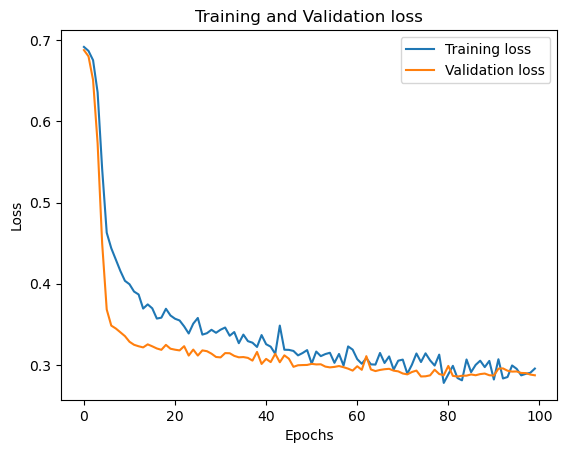

In [533]:
# plottinh the training loss and validatin loss
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']], label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

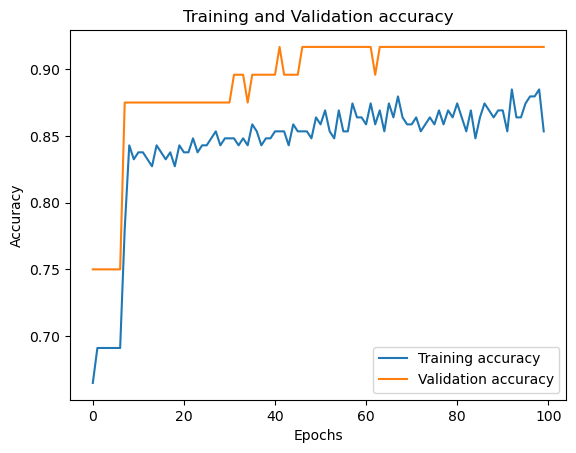

In [534]:
#  Training and validation accuracy
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [535]:
# Putting the scores of each model into a dataframe
models = pd.DataFrame({'Model': ['Logistic Regression', 'Naive Bayes', 'SVC', 'KNN', 'Random Forest', 'ANN'],'Score': [acc_log_reg, acc_gaussian, acc_svc, acc_knn, acc_randomforest, acc_score*100]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,80.00
2,SVC,76.67
3,KNN,76.67
4,Random Forest,76.67
1,Naive Bayes,75.00
5,ANN,75.00


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Naive Bayes'),
  Text(2, 0, 'SVC'),
  Text(3, 0, 'KNN'),
  Text(4, 0, 'Random Forest'),
  Text(5, 0, 'ANN')])

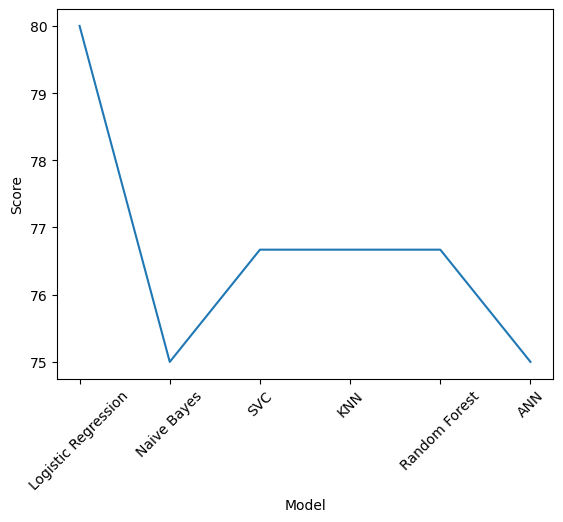

In [536]:
# Plotting the results of each model
sns.lineplot(data=models, y='Score', x='Model')
plt.xticks(rotation=45)